# Phase 1: Data Acquisition and Cleaning

## Project Foundation:


#### Dataset Selection & Justification


**Dataset:** COVID-19 Global Data (Full Version)  

**Source:** Our World in Data GitHub Repository – [Dataset Link](https://github.com/owid/covid-19-data/tree/master/public/data)  

**Description:**  
This dataset contains country-level daily COVID-19 statistics, including cases, deaths, vaccinations, testing, and demographic/economic indicators. Key columns include:  

- `location`: Country or region name  
- `date`: Date of observation  
- `total_cases`: Cumulative confirmed COVID-19 cases  
- `new_cases`: New cases reported for that day  
- `total_deaths`: Cumulative deaths  
- `new_deaths`: Daily deaths  
- `people_vaccinated`: Number of people vaccinated 

**Size:** Approximately 430,000 rows and 67 columns.  

**Suitability & Relevance:**  
- Real-world data with numeric, categorical, and date variables.  
- Contains missing values, outliers, and inconsistencies -> ideal for demonstrating data cleaning techniques.  
- Large enough to perform meaningful analysis but manageable for a Jupyter Notebook.  
- Relevant for public health, statistics, and data analysis assignments, making it easy to justify insights or visualizations.  

> ⚠ Note: This GitHub version is no longer updated as of August 19, 2024. For the latest data, OWID provides updated CSVs through their [data catalog](https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv).


In [200]:
# Import Dependencies

import pandas as pd
import numpy as np

In [201]:
# Import CSV and Create the DataFrame
data = "./owid-covid-data.csv"
covid_df = pd.read_csv(data)

## Data Cleaning:

 ### Raw Data Examination

Before cleaning, we systematically examine the raw COVID-19 dataset to identify potential issues.

The next 5 code cells do the following

1. **Check dataset shape** – number of rows and columns.  
2. **Check column data types** – numeric, categorical, and dates.  
3. **Check for missing values** – which columns have nulls and how many.  
4. **Check basic statistics** – min, max, mean, etc., to spot outliers.  
5. **Preview a few rows** – to detect inconsistencies or unexpected values.


In [202]:
# 1. Dataset shape
print("Dataset shape:", covid_df.shape)

Dataset shape: (429435, 67)


In [203]:
# 2. Column data types
print("\nColumn Data Types:\n", covid_df.dtypes)


Column Data Types:
 iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_pat

In [204]:
# 3. Count of missing values per column
pd.set_option('display.max_rows', None)
missing_values = covid_df.isna().sum()
print(missing_values[missing_values > 0])

continent                                      26525
total_cases                                    17631
new_cases                                      19276
new_cases_smoothed                             20506
total_deaths                                   17631
new_deaths                                     18827
new_deaths_smoothed                            20057
total_cases_per_million                        17631
new_cases_per_million                          19276
new_cases_smoothed_per_million                 20506
total_deaths_per_million                       17631
new_deaths_per_million                         18827
new_deaths_smoothed_per_million                20057
reproduction_rate                             244618
icu_patients                                  390319
icu_patients_per_million                      390319
hosp_patients                                 388779
hosp_patients_per_million                     388779
weekly_icu_admissions                         

In [205]:
# 4. Basic statistics for numeric columns
print("\nSummary Statistics:\n", covid_df.describe())


Summary Statistics:
         total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132900e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060828            112096.199420   
std      1368.322990           513.636565            162240.412405   
min         0.000000             0.000000                 

In [206]:
# 5. Preview first 5 rows
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [207]:
# Print column names
print(covid_df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Data cleaning
Now that we have examined the data, we can perform some cleaning:

1) **Changing the data type of "date" to from 'object' to 'datetime':**

When we printed the column data types above in action labeled: `# 2. Column data types`, 

we saw that the 'date' column was of type 'object'. The next code cell changes

the data type to 'datetime'


In [208]:
# changing the data type of "date" from 'object' to 'datetime'
covid_df['date'] = pd.to_datetime(covid_df['date'])
print("\nColumn Data Types:\n", covid_df.dtypes)


Column Data Types:
 iso_code                                              object
continent                                             object
location                                              object
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
rep

2) **Dropping columns with over 90% of data values missing:**

When we printed out the number of missing data entries above in the action labeled   `# 3. Count of missing values per column`,

we saw that many of the columns had majority of their values missing. So, in the next code cell, we drop all columns that

have > 90% missing values and print the remaining columns. 

In [209]:
# Drop columns with more than 90% missing values
threshold = 0.9 * len(covid_df)
covid_df_cleaned = covid_df.dropna(thresh=threshold, axis=1)

print("Dropped columns due to excessive missing values:")
print(set(covid_df.columns) - set(covid_df_cleaned.columns))

print("\nRemaining columns:", len(covid_df_cleaned.columns))


Dropped columns due to excessive missing values:
{'new_tests_per_thousand', 'cardiovasc_death_rate', 'total_vaccinations', 'aged_65_older', 'weekly_icu_admissions_per_million', 'total_tests', 'human_development_index', 'hospital_beds_per_thousand', 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'diabetes_prevalence', 'male_smokers', 'icu_patients', 'weekly_hosp_admissions', 'reproduction_rate', 'new_tests', 'total_tests_per_thousand', 'new_vaccinations', 'positive_rate', 'new_vaccinations_smoothed', 'excess_mortality_cumulative_absolute', 'new_tests_smoothed', 'people_fully_vaccinated', 'gdp_per_capita', 'weekly_icu_admissions', 'population_density', 'extreme_poverty', 'excess_mortality_cumulative', 'icu_patients_per_million', 'stringency_index', 'weekly_hosp_admissions_per_million', 'handwashing_facilities', 'excess_mortality', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'tests_units', 'new_tests_smoothed_per_thousand', 'excess_m

In [210]:
covid_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         429435 non-null  object        
 1   continent                        402910 non-null  object        
 2   location                         429435 non-null  object        
 3   date                             429435 non-null  datetime64[ns]
 4   total_cases                      411804 non-null  float64       
 5   new_cases                        410159 non-null  float64       
 6   new_cases_smoothed               408929 non-null  float64       
 7   total_deaths                     411804 non-null  float64       
 8   new_deaths                       410608 non-null  float64       
 9   new_deaths_smoothed              409378 non-null  float64       
 10  total_cases_per_million          411804 non-

3) **Manually picking which columns to drop now.**
We are not interested in:
- **isocode**
    - we have other metadata identifiers: 'continent, location, date'
    - so, this column is useless to us.
- Derived metrics (per million / smoothed) *_per_million, *_smoothed
    - These columns are redundant: they are scaled or averaged versions of core stats
    - dropping: 
        **new_cases_smoothed, new_deaths_smoothed, total_cases_per_million, 
        new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million
        new_deaths_per_million, new_deaths_smoothed_per_million**

In [211]:
columns_to_drop = [
    'iso_code', 'new_cases_smoothed', 'new_deaths_smoothed',
    'total_cases_per_million', 'new_cases_per_million'
    'new_cases_smoothed_per_million', 'total_deaths_per_million',
    'new_deaths_per_million',
]

covid_df_cleaned = covid_df_cleaned.drop(columns=columns_to_drop, errors='ignore')
print("Remaining columns:", covid_df_cleaned.columns.tolist())

Remaining columns: ['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'life_expectancy', 'population']


After cleaning, the dataset’s total missing values dropped from 14,586,938 to 139,026, confirming that most incomplete columns were successfully removed. The remaining missing values are minimal and may correspond to countries with limited reporting. This cleaned dataset is now suitable for analysis:

In [212]:
print("Missing before:", covid_df.isna().sum().sum())
print("Missing after:", covid_df_cleaned.isna().sum().sum())

Missing before: 14586938
Missing after: 198865


# Phase 2: Explanatory Data Analysis (EDA)

Now that we've successfully cleaned the data, it's time to dive into the analysis via visualizations, beginning first with importing the necessary libraries

In [213]:
# Import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis

### Graph 1: Deaths Per-Capita v.s. Time (Per Continent)

Let's beginning with a bar graph, analyzing the relationship between location and cases. This will allow us to see which locations had a higher mortality rate giving us a better idea of what countries were affected the most.
<br>Following this, we will take a look at how many cases resulted in death, and how that number changed over time.

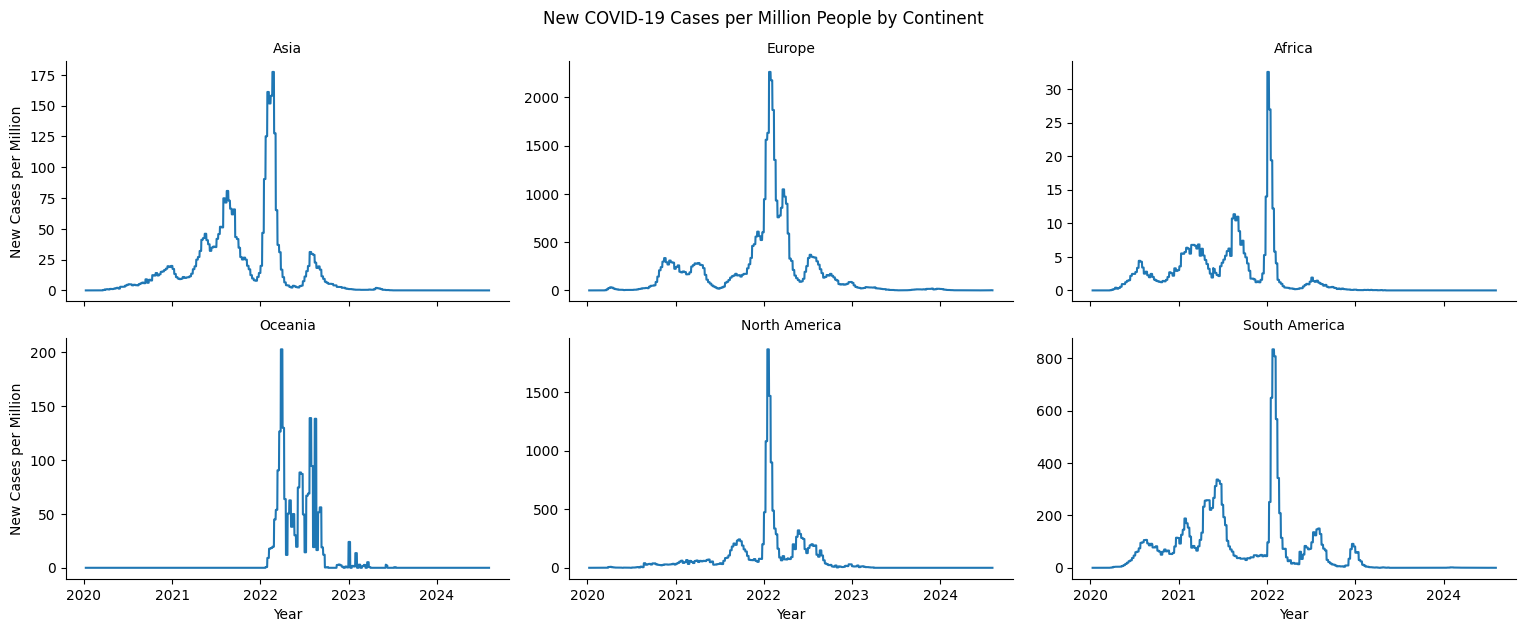

In [214]:

# Generate Plot
graph = sns.relplot(
    data=covid_df_cleaned,
    x="date", y="new_cases_smoothed_per_million",
    col="continent", col_wrap=3,
    kind="line",
    estimator="median",     # median is better for "typical" country per continent
    errorbar=None,
    height=3.2, aspect=1.6,
    facet_kws={"sharey": False}
)

# Titles & labels
graph.figure.subplots_adjust(top=0.9)
graph.figure.suptitle("New COVID-19 Cases per Million People by Continent")
graph.set_titles("{col_name}")
graph.set_axis_labels("Year", "New Cases per Million")
sns.despine()
plt.show()

### Analysis: New COVID-19 Cases per Million People by Continent

The figure illustrates the trajectory of COVID-19 infections normalized per million people across six continents from 2020 to 2024. The per-million adjustment allows for more equitable comparison between regions with vastly different population sizes.


Europe and North America exhibit the highest infection rates, with sharp peaks in late 2021 and early 2022, coinciding with the global spread of the "Delta" and "Omicron" variants of Covid-19. These spikes suggest both widespread transmission and extensive testing capacity in these regions. Asia and South America show similar multi-wave patterns but with comparatively lower per-capita intensities. Africa’s and Oceania’s curves remain much flatter, indicating either lower case burdens or underreporting due to testing limitations.

Across all continents, the trend converges toward minimal new cases by 2023, reflecting the combined effects of mass vaccination, natural immunity, and reduced global transmission. Overall, the figure underscores the uneven geographic distribution of COVID-19’s impact and highlights how healthcare infrastructure, testing capacity, and containment policies shaped regional case dynamics.

## Graph 2: Life Expectancy v.s. Covid-19 Mortality

For this we'll be analyzing the correlation between life-expectancy of a demographic and covid-deaths using a scatter plot. This will help build clarity on who were the most at risk and what factors to consider when analyzing the data further.

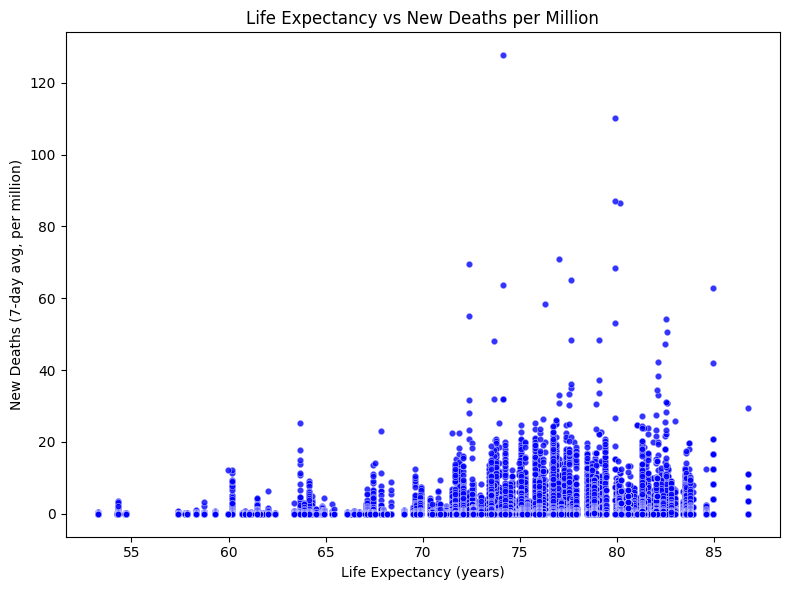

In [228]:



plt.figure(figsize=(8,6))
sns.scatterplot(data=covid_df_cleaned,
    x="life_expectancy",
    y="new_deaths_smoothed_per_million",
    color = "blue",
    alpha = 0.2,
    s = 20)


plt.title("Life Expectancy vs New Deaths per Million")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("New Deaths (7-day avg, per million)")
plt.tight_layout()
plt.show()


## Analysis: Life Expectancy vs. New Deaths per Million
This scatter plot examines the association between national life expectancy and new COVID-19 deaths per million people, averaged over a seven-day period. Each point represents a country’s observation, illustrating how pandemic mortality relates to underlying population health and demographic structure.

The distribution shows a weak relationship between life expectancy and mortality intensity. Countries with higher life expectancy, often wealthier and older populations, display a wider spread of new death rates, including several of the highest observed peaks. This suggests that advanced healthcare systems did not necessarily translate to lower per-capita mortality during peak outbreaks, likely due to the larger proportion of elderly citizens and early high transmission rates in developed regions.
